In [1]:
%load_ext autoreload
%autoreload 2
%env PROJ_LIB=/home/wwymak/anaconda3/envs/solaris/share/proj
%matplotlib inline

import rasterio
from torch.utils.tensorboard import SummaryWriter
import skimage
import geopandas as gpd
from matplotlib import pyplot as plt
from shapely.ops import cascaded_union
# import solaris as sol

from tqdm import tqdm
from skimage.external import tifffile as sktif

# import shapely.wkt
import geopandas as gpd
import numpy as np
import cv2
from functools import partial

from fastai.imports import *
from fastai.vision import *
from fastai.metrics import dice
from fastai.callbacks import *

from joblib import Parallel, delayed
import torch.nn.functional as F
import torch
import functools, traceback
def gpu_mem_restore(func):
    """Reclaim GPU RAM if CUDA out of memory happened, or execution was interrupted"""
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        try:
            return func(*args, **kwargs)
        except:
            type, val, tb = sys.exc_info()
            traceback.clear_frames(tb)
            raise type(val).with_traceback(tb) from None
    return wrapper

os.environ['FASTAI_TB_CLEAR_FRAMES']="1"
from importlib import reload

env: PROJ_LIB=/home/wwymak/anaconda3/envs/solaris/share/proj


In [3]:
data_dir = Path("/media/wwymak/Storage/spacenet_roads")
mumbai = data_dir/"AOI_8_Mumbai"
ms_mumbai = mumbai/"MS"
ps_rgb_mumbai = mumbai/"PS-RGB"

In [5]:
img_id = "chip19"
mask_fname = mumbai / "geojson_roads_speed" / f"SN5_roads_train_AOI_8_Mumbai_geojson_roads_speed_{img_id}.geojson"
# outfile = mask_folder / f"{img_id}.png"
# road_mask = np.zeros((1300,1300))
df = gpd.read_file(mask_fname)
df.head()

,OBJECTID,bridge,highway,osm_id,surface,lanes,inferred_speed_mph,inferred_speed_mps,origarea,origlen,partialDec,truncated,geometry
0,1094,None,secondary,683675331.0,paved,2,35.0,15.6464,0.0,0,1,0,LINESTRING (72.85742577561622 19.0243364093124...
1,1097,None,secondary,683675334.0,paved,4,45.0,20.1168,0.0,0,1,0,LINESTRING (72.85692370000004 19.0254491000000...
2,1098,None,secondary,683675335.0,paved,2,35.0,15.6464,0.0,0,1,0,LINESTRING (72.85749752242104 19.0248466656394...
3,1124,None,motorway,683675361.0,paved,2.5,55.0,24.5872,0.0,0,1,0,LINESTRING (72.85645545632443 19.0279899859037...
4,1126,None,motorway,683675362.0,paved,1.5,55.0,24.5872,0.0,0,1,0,LINESTRING (72.85652687643713 19.0279899859037...


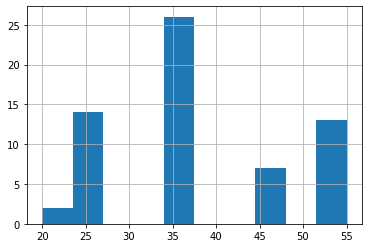

In [6]:
df.inferred_speed_mph.hist()

In [ ]:
df['speed_cls']